# Basic usage

`DustPy` is using on the `simframe` package for running scientific simulations. For a detailed description of the usage of `simframe` please have a look at the [Simframe Documentation](https://simframe.rtfd.io/).

In this notebook we'll run the most simple `DustPy` model, i.e., the model that is run by default.

## The Simulation Frame

To set up a model we have to import the `Simulation` class from the `DustPy` package.

In [1]:
from dustpy import Simulation

We can now create an instance of this class.

In [2]:
sim = Simulation()

`sim` is now an empty simulation object that controls our simulation.

In [3]:
sim

DustPy
------
    dust         : Group (Dust quantities)
    gas          : Group (Gas quantities)
    grid         : Group (Grid quantities)
    star         : Group (Stellar quantities)
  -----
    t            : NoneType
  -----
    Integrator   : not specified
    Writer       : not specified

All the fields are initialized with `None`. All attributes can be easiliy addressed via

In [4]:
sim.gas

Group (Gas quantities)
----------------------
    boundary     : Group (Boundary conditions)
    S            : Group (Source terms)
    v            : Group (Velocities)
  -----
    alpha        : NoneType
    cs           : NoneType
    eta          : NoneType
    Fi           : NoneType
    gamma        : NoneType
    Hp           : NoneType
    mfp          : NoneType
    mu           : NoneType
    n            : NoneType
    nu           : NoneType
    P            : NoneType
    rho          : NoneType
    Sigma        : NoneType
    SigmaFloor   : NoneType
    T            : NoneType
  -----

## Initializing

We can now initialize the `sim` object with `initialize()`. `DustPy` will then fill all the fields with default values.

In [5]:
sim.initialize()

As you can see, the `sim` object has now values assigned to the fields. All quantities are in cgs units.

In [6]:
sim.gas

Group (Gas quantities)
----------------------
    boundary     : Group (Boundary conditions)
    S            : Group (Source terms)
    v            : Group (Velocities)
  -----
    alpha        : Field (Turbulent alpha parameters)
    cs           : Field (Sound speed [cm/s])
    eta          : Field (Pressure gradient parameter)
    Fi           : Field (Gas flux interfaces [g/cm/s])
    gamma        : Field (Adiabatic index)
    Hp           : Field (Pressure scale height [cm])
    mfp          : Field (Midplane mean free path [cm])
    mu           : Field (Mean molecular weight [g])
    n            : Field (Miplane number density [1/cm³])
    nu           : Field (Kinematic viscosity [cm²/s])
    P            : Field (Midplane pressure [g/cm/s²])
    rho          : Field (Miplane mass density [g/cm³])
    Sigma        : Field (Surface density [g/cm²])
    SigmaFloor   : Field (Floor value of surface density [g/cm²])
    T            : Field (Temperature [K])
  -----

You can also display the full table of contents of the `sim` object.

In [7]:
sim.toc

DustPy
    - dust: Group (Dust quantities)
        - a: Field (Particle size [cm)
        - backreaction: Group (Backreaction coefficients)
            - A: Field (Pull factor)
            - B: Field (Push factor)
        - boundary: Group (Boundary conditions)
            - inner: No boundary condition set
            - outer: No boundary condition set
        - coagulation: Group (Coagulation quantities)
            - A: Field (Fragment normalization factors), constant
            - eps: Field (Remnant mass distribution), constant
            - lf_ind: Field (Index of largest fragment), constant
            - phi: Field (Fragment distribution), constant
            - rm_ind: Field (Smaller index of remnant), constant
            - stick: Field (Sticking matrix), constant
            - stick_ind: Field (Non-zero elements of sticking matrix), constant
        - D: Field (Diffusivity [cm²/s])
        - delta: Group (Mixing parameters)
            - rad: Field (Radial mixing parameter)
 

## Running a Simulation

The simulation is now ready to go. This might take a few minutes. The default simulation is running for 100,000 years.

In [8]:
sim.run()


DustPy v0.0.1

Documentation: https://dustpy.rtfd.io
PyPI:          https://pypi.org/project/dustpy
GitHub:        https://github.com/stammler/dustpy

Please cite:   Stammler & Birnstiel (in prep.)

Checking for mass conservation...

    - Sticking:
        max. rel. error:  2.81e-14
        for particle collision
            m[114] =  1.93e+04 g    with
            m[116] =  3.73e+04 g
    - Full fragmentation:
        max. rel. error:  4.44e-16
        for particle collision
            m[33] =  5.18e-08 g    with
            m[35] =  1.00e-07 g
    - Cratering:
        max. rel. error:  1.78e-15
        for particle collision
            m[110] =  5.18e+03 g    with
            m[118] =  7.20e+04 g

Creating data directory 'data'.
Writing file data/data0000.hdf5
Writing dump file data/frame.dmp
Writing file data/data0001.hdf5
Writing dump file data/frame.dmp
Writing file data/data0002.hdf5
Writing dump file data/frame.dmp
Writing file data/data0003.hdf5
Writing dump file data/frame

By default `DustPy` has written output files into the `data/` directory.

## Plotting

`DustPy` is coming with a simple plotting script that can be used to check the status of a simulation.

In [9]:
from dustpy import plot

The plotting script does either take the simulation object as argument or a data directory.

If the argument is a simulation object the script is only plotting the current state.

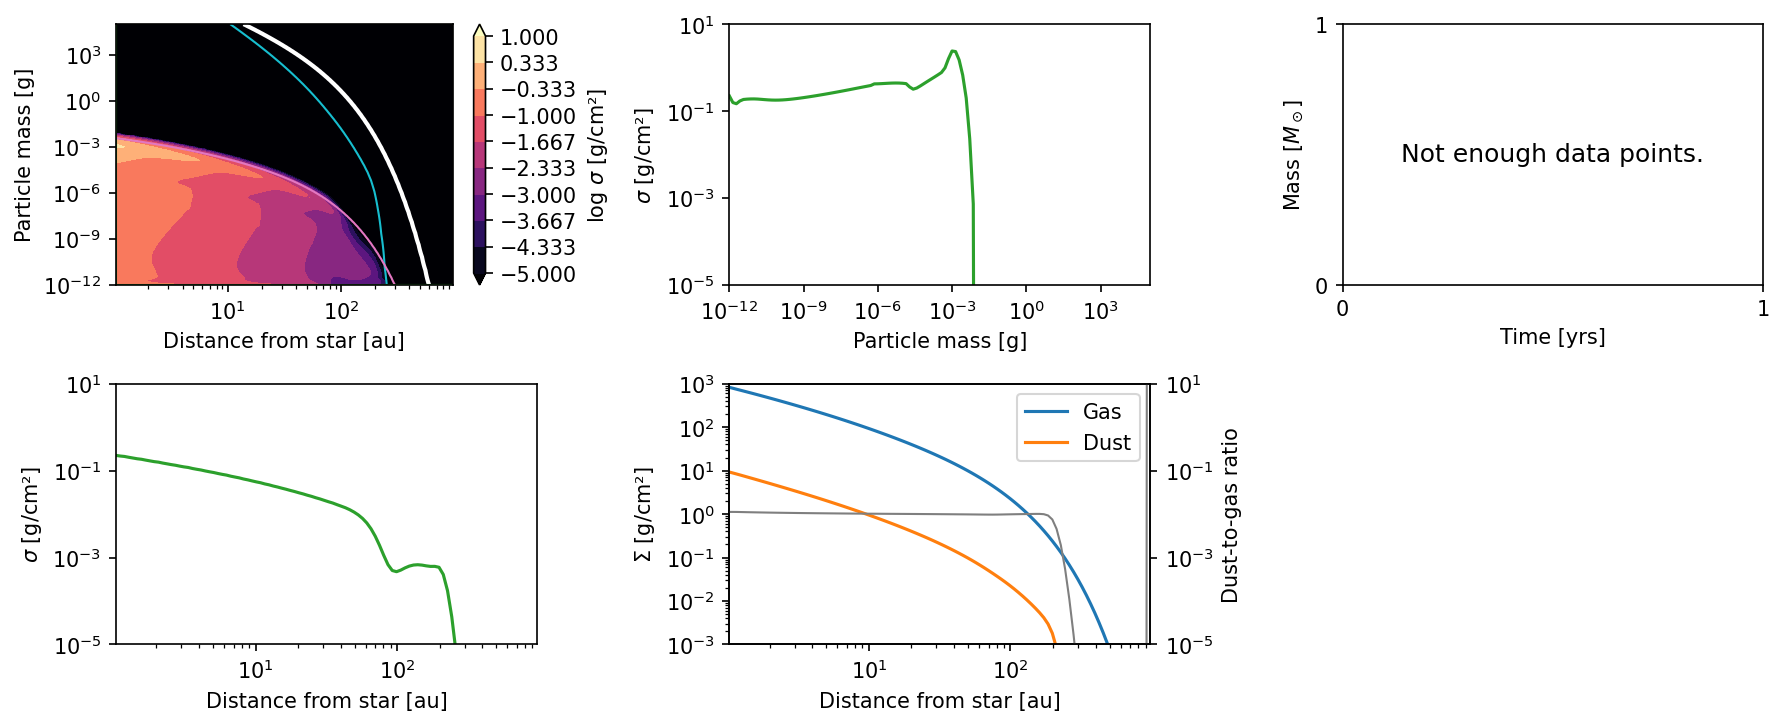

In [10]:
plot.panel(sim)

If you pass the data directory as argument, you also have access to the time evolution.

Furthermore, some plots can be addressed by specifying the time `it`, radial `ir`, or mass `im` index.

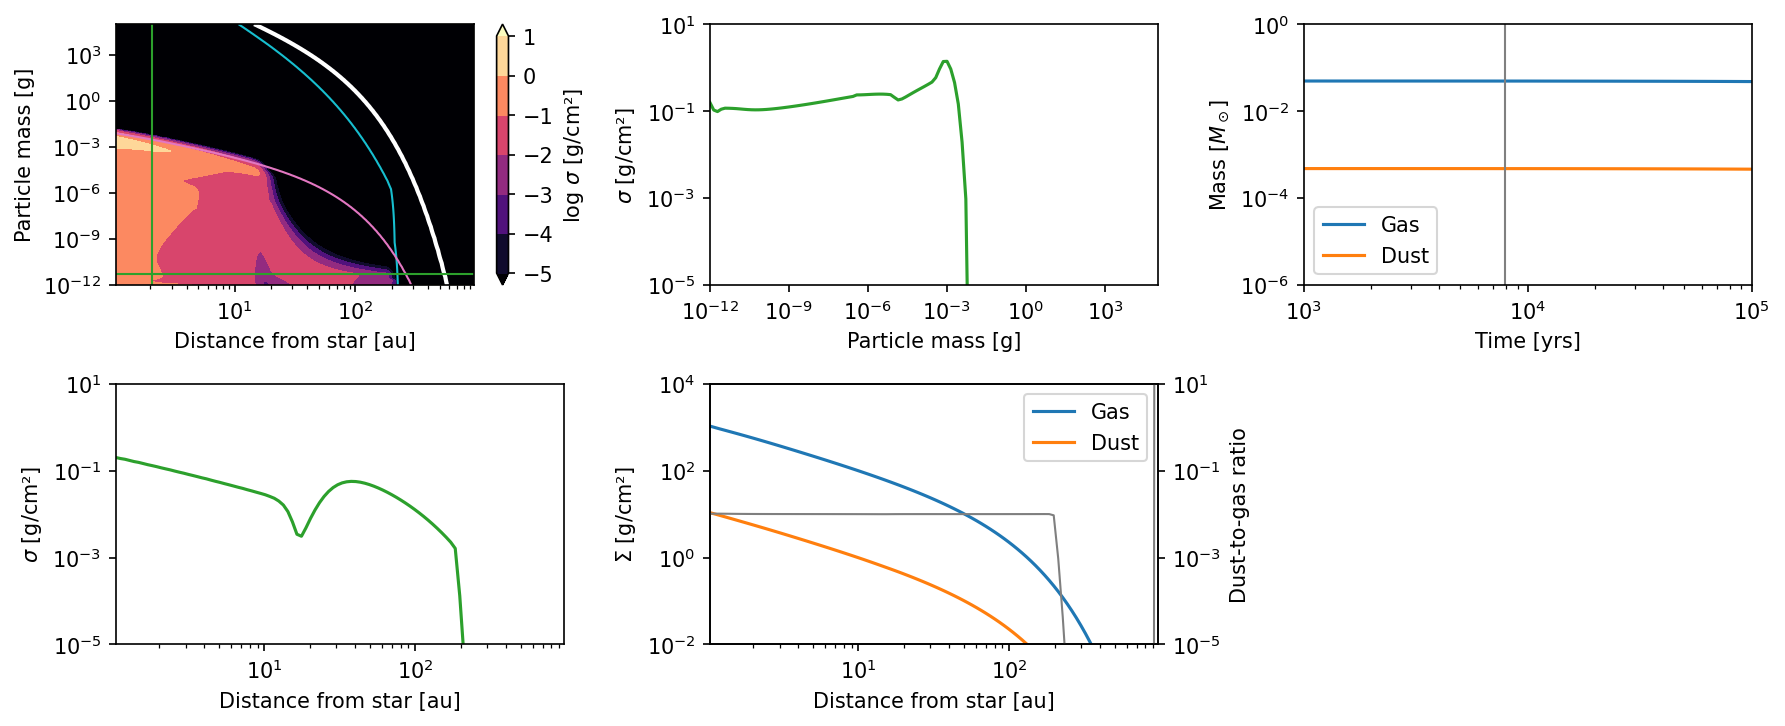

In [11]:
plot.panel("data", ir=10, im=5, it=10)

## Reading data files

If you want to read data files you can use the read/writer module provided by `simframe`, that is used to write the data.

In [12]:
from dustpy import hdf5writer

Make sure that the correct data directory is assigned to the writer.

In [13]:
hdf5writer

Writer (HDF5 file format using h5py)
------------------------------------
    Data directory : data
    File names     : data/data0000.hdf5
    Overwrite      : False
    Dumping        : True
    Options        : {'com': 'lzf', 'comopts': None}
    Verbosity      : 1

You can now read a single data file with

In [14]:
data0003 = hdf5writer.read.output(3)

This function returns a namespace and the data can simply be accessed in the same way as for the `Simulation` object.

In [15]:
data0003.gas.Sigma

array([1.03982929e+003, 9.85338106e+002, 9.35550538e+002, 8.83347760e+002,
       8.30782402e+002, 7.78757958e+002, 7.28208550e+002, 6.79806967e+002,
       6.33924927e+002, 5.90713249e+002, 5.50183671e+002, 5.12264577e+002,
       4.76837603e+002, 4.43762527e+002, 4.12893244e+002, 3.84086618e+002,
       3.57206457e+002, 3.32124800e+002, 3.08721989e+002, 2.86886306e+002,
       2.66513497e+002, 2.47506284e+002, 2.29773904e+002, 2.13231674e+002,
       1.97800589e+002, 1.83406941e+002, 1.69981969e+002, 1.57461529e+002,
       1.45785784e+002, 1.34898924e+002, 1.24748891e+002, 1.15287134e+002,
       1.06468373e+002, 9.82503813e+001, 9.05937845e+001, 8.34618672e+001,
       7.68203966e+001, 7.06374563e+001, 6.48832904e+001, 5.95301588e+001,
       5.45522001e+001, 4.99253049e+001, 4.56269954e+001, 4.16363137e+001,
       3.79337159e+001, 3.45009733e+001, 3.13210791e+001, 2.83781603e+001,
       2.56573947e+001, 2.31449332e+001, 2.08278251e+001, 1.86939487e+001,
       1.67319449e+001, 1

You can also read the full data directory with

In [16]:
data = hdf5writer.read.all()

The data has now an additional dimension for time.

In [17]:
data.gas.Sigma.shape

(22, 100)

## Reading Dump Files

The data files are only containing the pure data, but no information about the operations `DustPy` has to perform, like customized functions. Therefore, it's not possible to directly restart a simulation from data files.

`simframe` is saving a by default the most recent dump file, from which a simulation can be restarted.

In [18]:
from dustpy import readdump

In [19]:
sim_restart = readdump("data/frame.dmp") 

This is now a simulation frame that should be identical to our previous object.

In [20]:
sim.gas.Sigma == sim_restart.gas.Sigma

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

We can now, for example, add more snapshots and restart the simulation. Here we just want to extend the run by one year.

In [21]:
import numpy as np
from dustpy import constants as c

sim_restart.t.snapshots = np.concatenate((sim_restart.t.snapshots, [100001.*c.year]))

The current time is

In [22]:
sim_restart.t / c.year

100000.0

We can now restart the simulation for another year.

In [23]:
sim_restart.run()


DustPy v0.0.1

Documentation: https://dustpy.rtfd.io
PyPI:          https://pypi.org/project/dustpy
GitHub:        https://github.com/stammler/dustpy

Please cite:   Stammler & Birnstiel (in prep.)

Checking for mass conservation...

    - Sticking:
        max. rel. error:  2.81e-14
        for particle collision
            m[114] =  1.93e+04 g    with
            m[116] =  3.73e+04 g
    - Full fragmentation:
        max. rel. error:  4.44e-16
        for particle collision
            m[33] =  5.18e-08 g    with
            m[35] =  1.00e-07 g
    - Cratering:
        max. rel. error:  1.78e-15
        for particle collision
            m[110] =  5.18e+03 g    with
            m[118] =  7.20e+04 g

Writing file data/data0022.hdf5
Writing dump file data/frame.dmp
Execution time: 0:00:02


Another file was written and the current time is now

In [24]:
sim_restart.t / c.year

100001.0